In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from scipy import ndimage

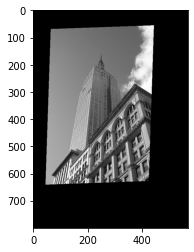

In [3]:
# Using Scipy for affine transformation
im = np.array(Image.open('../../images/empire.jpg').convert('L'))
H = np.array([[1.4,0.05,-100],[0.05,1.5,-100],[0,0,1]])
im2 = ndimage.affine_transform(im,H[:2,:2],(H[0,2],H[1,2]))

plt.figure()
plt.gray()
plt.imshow(im2)
plt.show()

In [4]:
# Script for warping
import warp

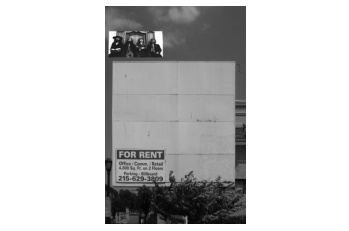

In [6]:
# Warping images

im1 = np.array(Image.open('../../images/beatles.png').convert('L'))
im2 = np.array(Image.open('../../images/billboard.jpg').convert('L'))

# Set points in im2
tp = np.array([[264,538,540,264],[40,36,605,605],[1,1,1,1]])

im3 = warp.image_in_image(im1,im2,tp)

plt.figure()
plt.gray()
plt.imshow(im3)
plt.axis('equal')
plt.axis('off')
plt.show()

In [2]:
# Script for ransac
import homography
# Script for SIFT detector
import sift

In [7]:
# Functions to convert the matches to hom. points
def convert_points(j):
    ndx = matches[j].nonzero()[0]
    fp = homography.make_homog(l[j+1][ndx,:2].T)
    ndx2 = [int(matches[j][i]) for i in ndx]
    tp = homography.make_homog(l[j][ndx2,:2].T)
    return fp,tp

In [9]:
# Process images
# File names are set as home0,home1,home2 to allow the use of for loop

featname = ['panorama/table'+str(i)+'.sift' for i in range(3)]
imname = ['panorama/table'+str(i)+'.jpg' for i in range(3)]

l = {}
d = {}

for i in range(3):
    sift.process_image(imname[i],featname[i])
    l[i], d[i] = sift.read_features_from_file(featname[i])

Finding ../../images/panorama/table0.jpg... Done
Detecting features... Done
Writing to ../../images/panorama/table0.sift... Done
Finding ../../images/panorama/table1.jpg... Done
Detecting features... Done
Writing to ../../images/panorama/table1.sift... Done
Finding ../../images/panorama/table2.jpg... Done
Detecting features... Done
Writing to ../../images/panorama/table2.sift... Done


In [10]:
# Write matches
matches = {}
for i in range(2):
    matches[i] = sift.match(d[i+1],d[i])

In [11]:
# Estimate homography
model = homography.RansacModel()

fp,tp = convert_points(1)
H_12 = homography.H_from_ransac(fp,tp,model)[0] #im 1 to 2

fp,tp = convert_points(0)
H_01 = homography.H_from_ransac(fp,tp,model)[0] #im 0 to 1

ValueError: did not meet fit acceptance criteria